In [15]:
import keras

#For this assignment, we will continue to use the UC Mercer Images Dataset.
#Please refer back to assignment 2 for more details; it is contained in the "mercerImages" folder.

#Let's get a quick net running with the Mercer Images Dataset, just to kick us off:
def exampleNet():
    m = keras.models.Sequential()
    m.add(keras.layers.Conv2D(filters=64,
                              kernel_size=(4,4),
                              activation="tanh",
                              input_shape=(256,256,3)))
    m.add(keras.layers.GlobalAveragePooling2D())
    m.add(keras.layers.Dense(units=21))
    m.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])
    
    return(m)

dataGenerator = keras.preprocessing.image.ImageDataGenerator()
train = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', batch_size=32)
    
exampleNet = exampleNet()
exampleNet.fit(train, epochs=15)

#Look at Network Structure:
#print(exampleNet.summary())
#keras.utils.plot_model(exampleNet, show_shapes=True)



Found 2100 images belonging to 21 classes.
Epoch 1/15
66/66 [==============================] - 3s 46ms/step - loss: 2.0776 - categorical_accuracy: 0.0552
Epoch 2/15
66/66 [==============================] - 3s 47ms/step - loss: 1.3559 - categorical_accuracy: 0.0642
Epoch 3/15
66/66 [==============================] - 3s 47ms/step - loss: 1.2837 - categorical_accuracy: 0.0538
Epoch 4/15
66/66 [==============================] - 3s 47ms/step - loss: 1.1833 - categorical_accuracy: 0.0681
Epoch 5/15
66/66 [==============================] - 3s 47ms/step - loss: 1.1303 - categorical_accuracy: 0.0767
Epoch 6/15
66/66 [==============================] - 3s 48ms/step - loss: 1.0874 - categorical_accuracy: 0.1007
Epoch 7/15
66/66 [==============================] - 3s 47ms/step - loss: 1.0759 - categorical_accuracy: 0.0767
Epoch 8/15
66/66 [==============================] - 3s 46ms/step - loss: 1.0628 - categorical_accuracy: 0.1141
Epoch 9/15
66/66 [==============================] - 3s 47ms/step - lo

Found 2100 images belonging to 21 classes.
Epoch 1/15
66/66 [==============================] - 4s 44ms/step - loss: 1.1507 - categorical_accuracy: 0.0459
Epoch 2/15
66/66 [==============================] - 3s 46ms/step - loss: 1.1448 - categorical_accuracy: 0.0609
Epoch 3/15
66/66 [==============================] - 3s 44ms/step - loss: 1.1502 - categorical_accuracy: 0.0487
Epoch 4/15
66/66 [==============================] - 3s 45ms/step - loss: 1.1386 - categorical_accuracy: 0.0567
Epoch 5/15
66/66 [==============================] - 3s 44ms/step - loss: 1.1336 - categorical_accuracy: 0.0838
Epoch 6/15
66/66 [==============================] - 3s 46ms/step - loss: 1.1348 - categorical_accuracy: 0.0619
Epoch 7/15
66/66 [==============================] - 3s 44ms/step - loss: 1.1311 - categorical_accuracy: 0.0816
Epoch 8/15
66/66 [==============================] - 3s 43ms/step - loss: 1.1274 - categorical_accuracy: 0.0920
Epoch 9/15
66/66 [==============================] - 3s 44ms/step - lo

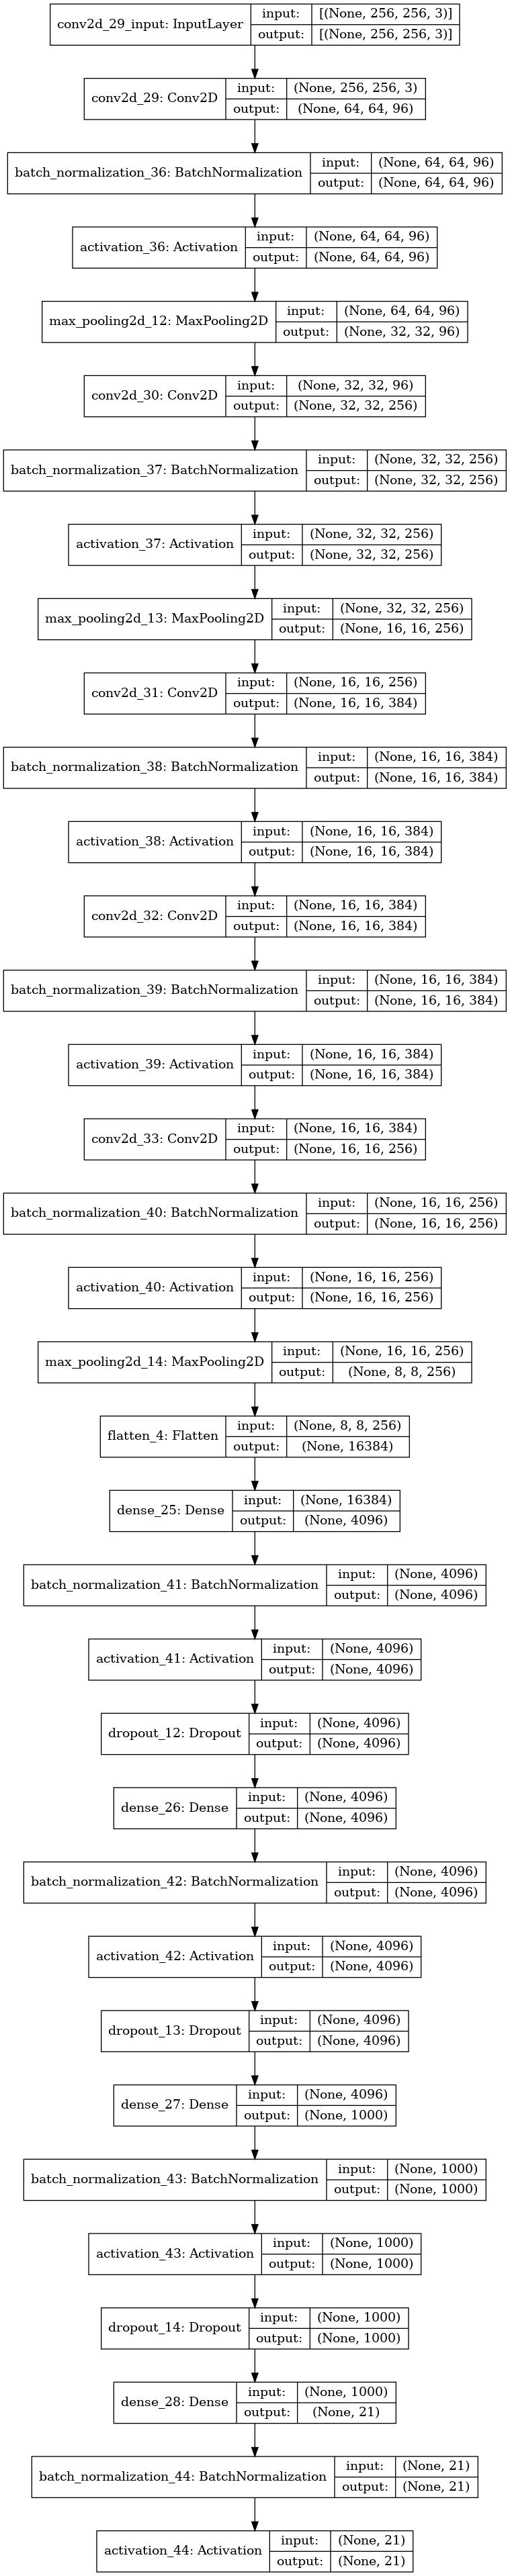

In [17]:
#Now let's look at some popular architectures for comparison
#Here is AlexNet!
def AlexNet():
    m = keras.models.Sequential()

    #Note the 256,256,3 input (from our Mercer Images)
    m.add(keras.layers.Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='same'))
    m.add(keras.layers.normalization.BatchNormalization())
    m.add(keras.layers.Activation('relu'))
    m.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Convolve
    m.add(keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))
    
    #Maxpool
    m.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Convolve
    m.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))

    #Convolve
    m.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))

    #Convolve
    m.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))
    m.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Affine Layer for Estimates
    m.add(keras.layers.Flatten())
    m.add(keras.layers.Dense(4096, input_shape=(32,32,3,)))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))

    #Dropout Regularization
    m.add(keras.layers.Dropout(0.4))

    #Affine
    m.add(keras.layers.Dense(4096))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))
    
    #Dropout Regularization
    m.add(keras.layers.Dropout(0.4))

    #Affine
    m.add(keras.layers.Dense(1000))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('relu'))

    #DropoutRegularization
    m.add(keras.layers.Dropout(0.4))

    #Final Affine (21 Scores, one for each class in our Mercer)
    m.add(keras.layers.Dense(21))
    m.add(keras.layers.BatchNormalization())
    m.add(keras.layers.Activation('softmax'))

    #Same optimizer for all of these examples, for a fair comparison.
    m.compile(optimizer=keras.optimizers.SGD(learning_rate=.001),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])

    return(m)

dataGenerator = keras.preprocessing.image.ImageDataGenerator()
train = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', batch_size=32)
    
AlexNet = AlexNet()
AlexNet.fit(train, epochs=15)

#Look at Network Structure:
#print(AlexNet.summary())
#keras.utils.plot_model(AlexNet, show_shapes=True)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 253, 253, 64)      3136      
_________________________________________________________________
global_average_pooling2d_8 ( (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 21)                1365      
Total params: 4,501
Trainable params: 4,501
Non-trainable params: 0
_________________________________________________________________
None


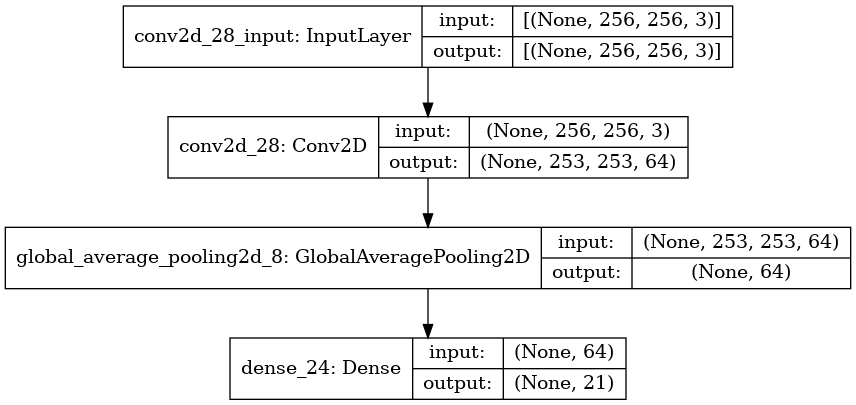

In [16]:
print(exampleNet.summary())
keras.utils.plot_model(exampleNet, show_shapes=True)